# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import time

# Download ticker list and stock price data

For this project, data for all stocks in NIFTY50 Index will be used

In [2]:
tickers = pd.read_csv('https://archives.nseindia.com/content/indices/ind_nifty50list.csv',usecols=["Symbol"])
print(tickers)

        Symbol
0     ADANIENT
1   ADANIPORTS
2   APOLLOHOSP
3   ASIANPAINT
4     AXISBANK
5   BAJAJ-AUTO
6   BAJFINANCE
7   BAJAJFINSV
8         BPCL
9   BHARTIARTL
10   BRITANNIA
11       CIPLA
12   COALINDIA
13    DIVISLAB
14     DRREDDY
15   EICHERMOT
16      GRASIM
17     HCLTECH
18    HDFCBANK
19    HDFCLIFE
20  HEROMOTOCO
21    HINDALCO
22  HINDUNILVR
23        HDFC
24   ICICIBANK
25         ITC
26  INDUSINDBK
27        INFY
28    JSWSTEEL
29   KOTAKBANK
30          LT
31         M&M
32      MARUTI
33        NTPC
34   NESTLEIND
35        ONGC
36   POWERGRID
37    RELIANCE
38     SBILIFE
39        SBIN
40   SUNPHARMA
41         TCS
42  TATACONSUM
43  TATAMOTORS
44   TATASTEEL
45       TECHM
46       TITAN
47         UPL
48  ULTRACEMCO
49       WIPRO


In [ ]:
for i in range(0,50,5):
    for k in range(5):
        k=i+k
        stock = str(tickers._get_value(k,"Symbol"))
        #fetch ticker data from alphavantage using API key
        url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+stock+".BSE&outputsize=full&apikey=RP3WGQYR7V4XW0J7&datatype=csv"
        history = pd.read_csv(url)
        file_name = str(stock)+'.csv'
        
        # saving csv locally
        history.to_csv(file_name)
        
    time.sleep(80)

Upon data inspection it was found the HDFCLIFE & SBILIFE do not have enough historic data and are not useful for this analysis
These tickers are being dropped from the tickers dataframe

In [3]:
tickers = tickers.drop([19, 38])
tickers = tickers.reset_index()
tickers = tickers.loc[:,['Symbol']]

print(tickers)

        Symbol
0     ADANIENT
1   ADANIPORTS
2   APOLLOHOSP
3   ASIANPAINT
4     AXISBANK
5   BAJAJ-AUTO
6   BAJFINANCE
7   BAJAJFINSV
8         BPCL
9   BHARTIARTL
10   BRITANNIA
11       CIPLA
12   COALINDIA
13    DIVISLAB
14     DRREDDY
15   EICHERMOT
16      GRASIM
17     HCLTECH
18    HDFCBANK
19  HEROMOTOCO
20    HINDALCO
21  HINDUNILVR
22        HDFC
23   ICICIBANK
24         ITC
25  INDUSINDBK
26        INFY
27    JSWSTEEL
28   KOTAKBANK
29          LT
30         M&M
31      MARUTI
32        NTPC
33   NESTLEIND
34        ONGC
35   POWERGRID
36    RELIANCE
37        SBIN
38   SUNPHARMA
39         TCS
40  TATACONSUM
41  TATAMOTORS
42   TATASTEEL
43       TECHM
44       TITAN
45         UPL
46  ULTRACEMCO
47       WIPRO


In [4]:
tickers.shape[0]

48

# Check first csv file

In [71]:
#load first csv file to pandas dataframe and view details
stock = str(tickers._get_value(0,"Symbol"))
print(stock)
file_name = str(stock)+'.csv'
ticker = pd.read_csv(file_name)

display(ticker)

ADANIENT


,Unnamed: 0,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,0,2022-11-11,4049.0000,4049.0000,3975.0500,4008.7000,4008.7000,78668,0.0,1.0
1,1,2022-11-10,3997.1499,4028.0000,3962.7500,3992.8999,3992.8999,73105,0.0,1.0
2,2,2022-11-09,3970.0500,4047.2500,3943.3501,3997.1499,3997.1499,198050,0.0,1.0
3,3,2022-11-07,3840.1499,4015.0000,3820.6001,3961.1499,3961.1499,231469,0.0,1.0
4,4,2022-11-04,3630.0000,3850.0000,3566.2000,3832.3501,3832.3501,308319,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4395,4395,2005-01-07,7.4733,7.4733,7.2110,7.2853,3.3871,1019230,0.0,1.0
4396,4396,2005-01-06,7.3744,7.4486,6.9982,7.2605,3.3756,1112474,0.0,1.0
4397,4397,2005-01-05,7.6020,7.6119,7.1269,7.3744,3.4285,1112378,0.0,1.0
4398,4398,2005-01-04,7.8000,7.8000,7.6020,7.6466,3.5551,1197010,0.0,1.0


In [6]:
#check datatypes
ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4400 non-null   int64  
 1   timestamp          4400 non-null   object 
 2   open               4400 non-null   float64
 3   high               4400 non-null   float64
 4   low                4400 non-null   float64
 5   close              4400 non-null   float64
 6   adjusted_close     4400 non-null   float64
 7   volume             4400 non-null   int64  
 8   dividend_amount    4400 non-null   float64
 9   split_coefficient  4400 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 343.9+ KB


In [7]:
#check for any null values
ticker.isnull().sum()

Unnamed: 0           0
timestamp            0
open                 0
high                 0
low                  0
close                0
adjusted_close       0
volume               0
dividend_amount      0
split_coefficient    0
dtype: int64

# Cleaning & Visualing stock price data

In [72]:
#add ticker symbol to the dataframe
ticker['Symbol']= stock

#convert timestamp column to datetime type
ticker['timestamp'] = pd.to_datetime(ticker['timestamp'])

        
#change index to timestamp
ticker.set_index('timestamp', inplace=True)

#Select & rename columns relevant for this analysis
ticker = ticker.loc[:,['Symbol', 'adjusted_close']]
ticker.rename(columns = {'adjusted_close':'Close'}, inplace = True)

#flip dataframe to get earliest date first
ticker = ticker.iloc[::-1]
display(ticker)

,Symbol,Close
timestamp,,
2005-01-03,ADANIENT,3.5827
2005-01-04,ADANIENT,3.5551
2005-01-05,ADANIENT,3.4285
2005-01-06,ADANIENT,3.3756
2005-01-07,ADANIENT,3.3871
...,...,...
2022-11-04,ADANIENT,3832.3501
2022-11-07,ADANIENT,3961.1499
2022-11-09,ADANIENT,3997.1499


<AxesSubplot:xlabel='timestamp'>

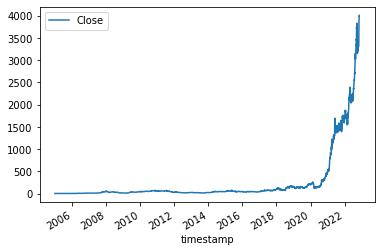

In [9]:
#Plot closing prices as a line chart
ticker.plot.line(y="Close", use_index = True)

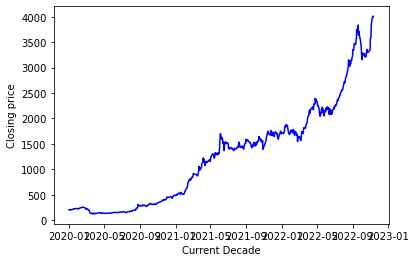

In [10]:
# Zoom into 2020's as stock price was relatively flat till then
ticker20s = ticker['2020-01-01' :'2022-12-31']

#Plot closing prices for this decade
fig, ax = plt.subplots()
ax.plot(ticker20s.index,ticker20s['Close'], color='blue')
ax.set_xlabel('Current Decade')
ax.set_ylabel('Closing price')
plt.show()

In [73]:
#Add a column depicting previous day's closing price

ticker['Prev_close'] = ticker.loc[:,'Close'].shift(1)
  
#Add simple moving average columns for periods of 30,40,50 & 60 days
#SMA to be calculated on prvious day's closing price to avoid any data leakage

ticker['30SMA'] = ticker['Prev_close'].rolling(30).mean()
ticker['40SMA'] = ticker['Prev_close'].rolling(40).mean()
ticker['50SMA'] = ticker['Prev_close'].rolling(50).mean()
ticker['60SMA'] = ticker['Prev_close'].rolling(60).mean()
  
#Calculate Standard deviation for these SMA columns to understand if this stock has been trading flat
#(consolidating) or not. A lower Std Dev value would indicate less fluctuation in stock price.

ticker['Std Dev'] = ticker.loc[:,['30SMA','40SMA','50SMA','60SMA']].std(axis=1)
    
#Add a column depicting closing price 60 days in future

ticker['Nxt60'] = ticker.loc[:,'Close'].shift(-60)

#Calculate the percentage difference between current and closing price in next 60 days

ticker['Nxt60%Diff'] = ticker[['Close','Nxt60']].pct_change(axis=1)['Nxt60']

#Add a column depicting maximum closing price in the next 60 days

ticker['60Max'] = ticker['Nxt60'].rolling(60).max() 
   
#Calculate the percentage difference between current and max closing price in next 60 days

ticker['Max%Diff'] = ticker[['Close','60Max']].pct_change(axis=1)['60Max']

#Check whether price increased more than 5% or not
ticker['Target'] = np.where(ticker['Max%Diff']> 0.05,1,0)
    
display(ticker)

,Symbol,Close,Prev_close,30SMA,40SMA,50SMA,60SMA,Std Dev,Nxt60,Nxt60%Diff,60Max,Max%Diff,Target
timestamp,,,,,,,,,,,,,
2005-01-03,ADANIENT,3.5827,NaN,NaN,NaN,NaN,NaN,NaN,2.7497,-0.232506,NaN,0.0,0
2005-01-04,ADANIENT,3.5551,3.5827,NaN,NaN,NaN,NaN,NaN,2.7612,-0.223313,NaN,0.0,0
2005-01-05,ADANIENT,3.4285,3.5551,NaN,NaN,NaN,NaN,NaN,2.7543,-0.196646,NaN,0.0,0
2005-01-06,ADANIENT,3.3756,3.4285,NaN,NaN,NaN,NaN,NaN,2.7290,-0.191551,NaN,0.0,0
2005-01-07,ADANIENT,3.3871,3.3756,NaN,NaN,NaN,NaN,NaN,2.7451,-0.189543,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,ADANIENT,3832.3501,3591.1001,3386.356670,3440.801242,3394.148996,3317.338335,50.914849,NaN,0.000000,NaN,0.0,0
2022-11-07,ADANIENT,3961.1499,3832.3501,3392.720007,3449.763743,3410.323000,3336.250835,47.152287,NaN,0.000000,NaN,0.0,0
2022-11-09,ADANIENT,3997.1499,3961.1499,3400.868337,3462.243740,3426.813996,3355.730832,44.842869,NaN,0.000000,NaN,0.0,0


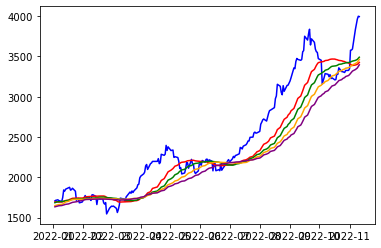

In [12]:
# plot moving averages for current year along with closing price on a chart

ticker22 = ticker['2022-01-01' :'2022-12-31']

fig, ax = plt.subplots()
ax.plot(ticker22.index,ticker22['Prev_close'], color='blue')
ax.plot(ticker22.index,ticker22['30SMA'], color='red')
ax.plot(ticker22.index,ticker22['40SMA'], color='green')
ax.plot(ticker22.index,ticker22['50SMA'], color='orange')
ax.plot(ticker22.index,ticker22['60SMA'], color='purple')
plt.show()

In [74]:
#drop rows with blanks to get a clean dataset
ticker = ticker.dropna()
display(ticker)

,Symbol,Close,Prev_close,30SMA,40SMA,50SMA,60SMA,Std Dev,Nxt60,Nxt60%Diff,60Max,Max%Diff,Target
timestamp,,,,,,,,,,,,,
2005-03-31,ADANIENT,2.7497,2.7451,3.341027,3.397652,3.389656,3.393105,0.026426,2.9614,0.076990,3.0420,0.106303,1
2005-04-01,ADANIENT,2.7612,2.7497,3.315177,3.379128,3.378794,3.379222,0.031936,2.9430,0.065841,3.0420,0.101695,1
2005-04-04,ADANIENT,2.7543,2.7612,3.290937,3.359625,3.367518,3.365990,0.036879,2.9016,0.053480,3.0420,0.104455,1
2005-04-05,ADANIENT,2.7290,2.7543,3.266773,3.340640,3.356196,3.354753,0.042462,2.8832,0.056504,3.0420,0.114694,1
2005-04-06,ADANIENT,2.7451,2.7290,3.242227,3.322057,3.345150,3.343977,0.048592,2.8809,0.049470,3.0420,0.108156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,ADANIENT,2697.6001,2723.2000,2409.280217,2338.860212,2307.076758,2277.670448,56.527841,3832.3501,0.420652,3835.8000,0.421931,1
2022-08-08,ADANIENT,2792.3501,2697.6001,2427.180847,2351.294858,2319.444444,2288.394177,59.555730,3961.1499,0.418572,3961.1499,0.418572,1
2022-08-10,ADANIENT,2826.8501,2792.3501,2447.576760,2369.089480,2331.996858,2299.830773,63.610227,3997.1499,0.413994,3997.1499,0.413994,1


In [14]:
#check for any null values
ticker.isnull().sum()

Symbol        0
Close         0
Prev_close    0
30SMA         0
40SMA         0
50SMA         0
60SMA         0
Std Dev       0
Nxt60         0
Nxt60%Diff    0
60Max         0
Max%Diff      0
Target        0
dtype: int64

# Train a Machine Learning Model

In [75]:
#set features & target
predictors = ["Prev_close", "30SMA", "40SMA", "50SMA", "60SMA"]

#split data for training & testing (using timeframe till end of 2019 to avoid stock price shift after 2020)
Train = ticker['2005-01-01' :'2018-12-31']
Test = ticker['2019-01-01' :'2019-12-31']

x_train = Train[predictors]
y_train = Train["Target"]

x_test = Test[predictors]
y_test = Test["Target"]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3386, 5) (3386,) (244, 5) (244,)


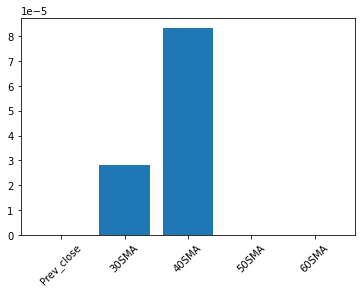

In [16]:
# Use lasso regression model to try and identify important features of dataset

from sklearn.linear_model import Lasso

X = ticker[predictors].values
y = ticker["Target"].values

names = ticker[predictors].columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [17]:
# Use Random Forest machine learning model on the dataset

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=42, n_jobs=-1,oob_score=True)

model.fit(x_train, y_train)
preds = model.predict(x_test)
preds = pd.Series(preds,index=x_test.index)

In [18]:
#R-Squared value of the model
RSq = model.score(x_test, y_test)

#check precison score of the model
from sklearn.metrics import precision_score
PS = precision_score(y_test, preds)

# Model RMSE score
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, preds, squared=False)

print("R-Squared value of the model: ", str(round(RSq*100,1))+"%")
print("Precision  score of the model: ", str(round(PS*100,1))+"%")
print("Model RMSE score: ", str(round(RMSE*100,1))+"%")

R-Squared value of the model:  63.5%
Precision  score of the model:  84.5%
Model RMSE score:  60.4%


# Perform Hyperparameter Tuning

In [19]:
# Number of trees in random forest
n_estimators = list(range(100,500,10))

# Minimum number of samples required to split a node
min_samples_split = list(range(2,50,2))

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': n_estimators,'min_samples_split': min_samples_split}

model = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)

model_cv = RandomizedSearchCV(model, param_grid)

model_cv.fit(x_train, y_train)

model_cv.best_score_

rf_best = model_cv.best_estimator_
rf_best

RandomForestClassifier(min_samples_split=6, n_estimators=190, n_jobs=-1,
                       oob_score=True, random_state=42)

In [21]:
# Use tuned model on the dataset to calculate scores again

#R-Squared value of the model
RSq = rf_best.score(x_test, y_test)

#check precison score of the model
from sklearn.metrics import precision_score

preds = rf_best.predict(x_test)
preds = pd.Series(preds,index=x_test.index)

PS = precision_score(y_test, preds)

# Model RMSE score
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, preds, squared=False)

print("R-Squared value of the model: ", str(round(RSq*100,1))+"%")
print("Precision  score of the model: ", str(round(PS*100,1))+"%")
print("Model RMSE score: ", str(round(RMSE*100,1))+"%")

R-Squared value of the model:  68.9%
Precision  score of the model:  86.0%
Model RMSE score:  55.8%


# Building a Back Testing System

First 5-years of Ticker data will be used as training set and 6th year as test set. Generated predictions will be stored
in a list.
With each iteration of for loop, training data size will increase by a year and the one after becomes test data.
This will help the model learn market movement better and account for price shifts over the years.

In [22]:
def predict(train, test, predictors, model):      
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test[["Close","Nxt60","Nxt60%Diff","Std Dev","60Max","Target"]],preds], axis=1)
    return combined

In [23]:
def backtest(data, model, predictors, start=1250, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

# Predicting the target & generate result

In [76]:
#Run tuned model with full data set and added backtesting function built in and get predictions

predictions = backtest(ticker, rf_best, predictors)

In [77]:
# Calculate precision score

PS = precision_score(predictions["Target"], predictions["Predictions"])
print("Precison score of the model: ", str(round(PS*100,1))+"%")

Precison score of the model:  81.2%


In [78]:
predictions

,Close,Nxt60,Nxt60%Diff,Std Dev,60Max,Target,Predictions
timestamp,,,,,,,
2010-05-04,52.6428,54.8012,0.041001,0.361977,55.7356,1,1
2010-05-05,52.7829,55.1750,0.045320,0.417436,55.7356,1,1
2010-05-06,52.8063,54.3901,0.029993,0.481090,55.7356,1,1
2010-05-07,52.4699,54.3901,0.036596,0.561497,55.7356,1,1
2010-05-10,54.2499,56.9690,0.050122,0.636667,56.9690,1,1
...,...,...,...,...,...,...,...
2022-08-05,2697.6001,3832.3501,0.420652,56.527841,3835.8000,1,1
2022-08-08,2792.3501,3961.1499,0.418572,59.555730,3961.1499,1,1
2022-08-10,2826.8501,3997.1499,0.413994,63.610227,3997.1499,1,1


As per hypothesis, we're only interested in trading period where stock price had less fluctuation
In other words, stock was consolidating. Therfore we'll filter the predictions dataframe.

In [79]:
# Filter predictions dataframe for only those rows where standard deviation is lower than 5
predictions_filtered = predictions[predictions['Std Dev'] < 5]
predictions_filtered

,Close,Nxt60,Nxt60%Diff,Std Dev,60Max,Target,Predictions
timestamp,,,,,,,
2010-05-04,52.6428,54.8012,0.041001,0.361977,55.7356,1,1
2010-05-05,52.7829,55.1750,0.045320,0.417436,55.7356,1,1
2010-05-06,52.8063,54.3901,0.029993,0.481090,55.7356,1,1
2010-05-07,52.4699,54.3901,0.036596,0.561497,55.7356,1,1
2010-05-10,54.2499,56.9690,0.050122,0.636667,56.9690,1,1
...,...,...,...,...,...,...,...
2020-08-17,197.5349,359.1089,0.817952,4.528839,359.1089,1,1
2020-08-18,213.4675,359.8082,0.685541,4.601459,359.8082,1,1
2020-08-19,238.7900,365.1024,0.528969,4.736306,365.1024,1,1


Checking the performance of model if trading was done on all days when stock was consolidating 
vs only on days when prediction was 1. 

Model Prediction Based Trading:

Trading amount is set to Rs 1000 per trading day and minimum profit expectation is 5%
Where prediction & target are 1, trade resulted in at least 5% profit.
Where prediction is 1 but target is 0, profit did not reach 5% in next 60 days and trade was exited on 60th day with P/L calculated at that day's price.
When prediction is 0, no trade was taken

Estimated Profit Based Trading:

Trading is done each day when Std deviation was less than 5
Trading amount is set to Rs 1000 per trading day and minimum profit expectation is 5%
Where target is 1, trade resulted in at least 5% profit.
Where target is 0, profit did not reach 5% in next 60 days and trade was exited on 60th day with P/L calculated at that day's price.


In [80]:
# Define functions to calculate model prediction based trades vs estimated profit based trades

def Pred_Based_PL(df_row):
    if (df_row['Predictions'] == 1.0) & (df_row['Target'] == 1):
        PL = 1000*0.05
    elif (df_row['Predictions'] == 1.0) & (df_row['Target'] == 0):
        PL = df_row['Nxt60%Diff']*1000
    else:
        PL = 0
    return PL

def EP_Based_PL(df_row):
    if (df_row['Target'] == 1):
        PL = 1000*0.05
    else:
        PL = df_row['Nxt60%Diff']*1000
    return PL

# Add two columns in dataframe storing Profit/Loss figures from each approach
pd.set_option('mode.chained_assignment', None)
predictions_filtered['Pred Based P/L'] = predictions_filtered.apply(Pred_Based_PL, axis=1)
predictions_filtered['EP based P/L'] = predictions_filtered.apply(EP_Based_PL, axis=1)

In [81]:
predictions_filtered

,Close,Nxt60,Nxt60%Diff,Std Dev,60Max,Target,Predictions,Pred Based P/L,EP based P/L
timestamp,,,,,,,,,
2010-05-04,52.6428,54.8012,0.041001,0.361977,55.7356,1,1,50.0,50.0
2010-05-05,52.7829,55.1750,0.045320,0.417436,55.7356,1,1,50.0,50.0
2010-05-06,52.8063,54.3901,0.029993,0.481090,55.7356,1,1,50.0,50.0
2010-05-07,52.4699,54.3901,0.036596,0.561497,55.7356,1,1,50.0,50.0
2010-05-10,54.2499,56.9690,0.050122,0.636667,56.9690,1,1,50.0,50.0
...,...,...,...,...,...,...,...,...,...
2020-08-17,197.5349,359.1089,0.817952,4.528839,359.1089,1,1,50.0,50.0
2020-08-18,213.4675,359.8082,0.685541,4.601459,359.8082,1,1,50.0,50.0
2020-08-19,238.7900,365.1024,0.528969,4.736306,365.1024,1,1,50.0,50.0


Prediction based trading model performed better for ADANIENT
Profit/Loss from prediction based trading:  9728.2
Profit/Loss from estimation based trading:  -5316.53


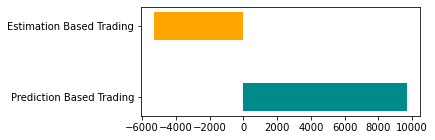

In [82]:
# Calculate sum of Profit/Loss from each approach
PredPL = predictions_filtered['Pred Based P/L'].sum()
EstimatedProfitPL = predictions_filtered['EP based P/L'].sum()

if PredPL > EstimatedProfitPL:
    print("Prediction based trading model performed better for", str(stock))
elif EstimatedProfitPL > PredPL:
    print("Estimated profit based trading model performed better for", str(stock))
else:
    print("Both models performed the same for", str(stock))
    

print("Profit/Loss from prediction based trading: ", str(round(PredPL,2)))
print("Profit/Loss from estimation based trading: ", str(round(EstimatedProfitPL,2)))
x = ["Prediction Based Trading", "Estimation Based Trading"]
y = [PredPL, EstimatedProfitPL]
c = ['DarkCyan','Orange']
plt.figure(figsize=(5,2))
plt.barh(x,y, color=c, height = 0.4)
plt.show()

# Generate results for all stocks in NIFTY50 Index

In [83]:
def dataprep(stock):    
    file_name = str(stock)+'.csv'
    ticker = pd.read_csv(file_name)
    ticker['Symbol']= stock
    ticker['timestamp'] = pd.to_datetime(ticker['timestamp'])
    ticker.set_index('timestamp', inplace=True)
    ticker = ticker.loc[:,['Symbol', 'adjusted_close']]
    ticker.rename(columns = {'adjusted_close':'Close'}, inplace = True)
    ticker = ticker.iloc[::-1]
    ticker['Prev_close'] = ticker.loc[:,'Close'].shift(1)
    ticker['30SMA'] = ticker['Prev_close'].rolling(30).mean()
    ticker['40SMA'] = ticker['Prev_close'].rolling(40).mean()
    ticker['50SMA'] = ticker['Prev_close'].rolling(50).mean()
    ticker['60SMA'] = ticker['Prev_close'].rolling(60).mean()
    ticker['Std Dev'] = ticker.loc[:,['30SMA','40SMA','50SMA','60SMA']].std(axis=1)
    ticker['Nxt60'] = ticker.loc[:,'Close'].shift(-60)
    ticker['Nxt60%Diff'] = ticker[['Close','Nxt60']].pct_change(axis=1)['Nxt60']
    ticker['60Max'] = ticker['Nxt60'].rolling(60).max()
    ticker['Max%Diff'] = ticker[['Close','60Max']].pct_change(axis=1)['60Max']
    ticker['Target'] = np.where(ticker['Max%Diff']> 0.05,1,0)
    ticker = ticker.dropna()
    return ticker

Prediction based trading model performed better for ADANIENT
Profit/Loss from prediction based trading:  9728.2
Profit/Loss from estimation based trading:  -5316.53


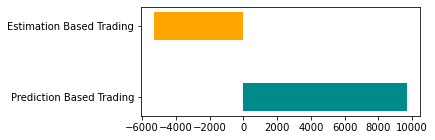

Prediction based trading model performed better for ADANIPORTS
Profit/Loss from prediction based trading:  20489.31
Profit/Loss from estimation based trading:  17947.39


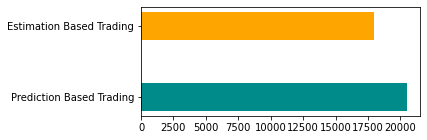

Estimated profit based trading model performed better for APOLLOHOSP
Profit/Loss from prediction based trading:  16975.83
Profit/Loss from estimation based trading:  19681.66


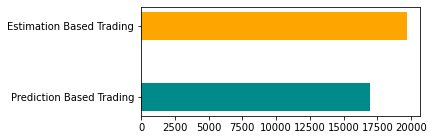

Estimated profit based trading model performed better for ASIANPAINT
Profit/Loss from prediction based trading:  27283.11
Profit/Loss from estimation based trading:  29435.92


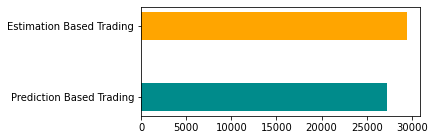

Prediction based trading model performed better for AXISBANK
Profit/Loss from prediction based trading:  7533.37
Profit/Loss from estimation based trading:  590.97


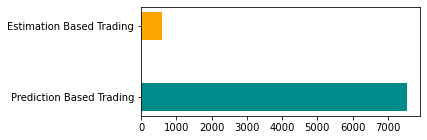

Estimated profit based trading model performed better for BAJAJ-AUTO
Profit/Loss from prediction based trading:  1438.9
Profit/Loss from estimation based trading:  2526.14


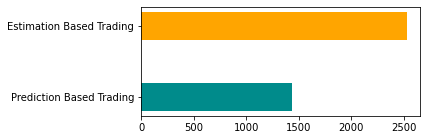

Estimated profit based trading model performed better for BAJFINANCE
Profit/Loss from prediction based trading:  27202.09
Profit/Loss from estimation based trading:  29028.09


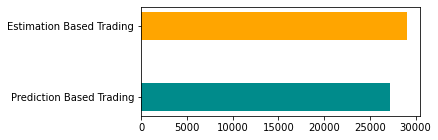

Estimated profit based trading model performed better for BAJAJFINSV
Profit/Loss from prediction based trading:  25071.65
Profit/Loss from estimation based trading:  30258.11


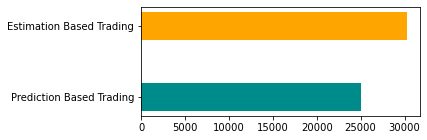

Prediction based trading model performed better for BPCL
Profit/Loss from prediction based trading:  12111.0
Profit/Loss from estimation based trading:  9094.75


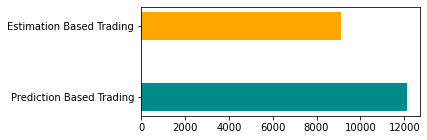

Estimated profit based trading model performed better for BHARTIARTL
Profit/Loss from prediction based trading:  4787.24
Profit/Loss from estimation based trading:  14076.29


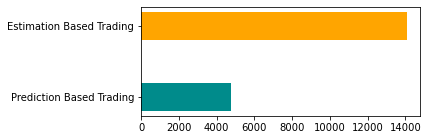

Estimated profit based trading model performed better for BRITANNIA
Profit/Loss from prediction based trading:  10993.01
Profit/Loss from estimation based trading:  16913.73


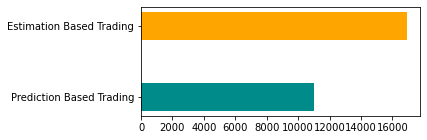

Estimated profit based trading model performed better for CIPLA
Profit/Loss from prediction based trading:  -9053.93
Profit/Loss from estimation based trading:  2761.49


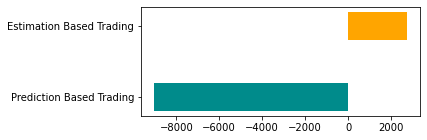

Estimated profit based trading model performed better for COALINDIA
Profit/Loss from prediction based trading:  -1976.8
Profit/Loss from estimation based trading:  4053.14


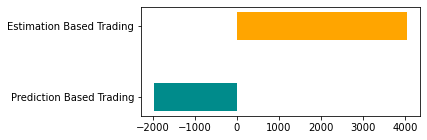

Estimated profit based trading model performed better for DIVISLAB
Profit/Loss from prediction based trading:  8163.04
Profit/Loss from estimation based trading:  13547.55


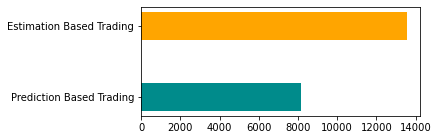

Estimated profit based trading model performed better for DRREDDY
Profit/Loss from prediction based trading:  2050.0
Profit/Loss from estimation based trading:  3153.76


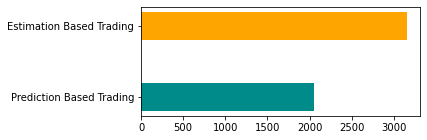

Estimated profit based trading model performed better for EICHERMOT
Profit/Loss from prediction based trading:  13309.51
Profit/Loss from estimation based trading:  32235.87


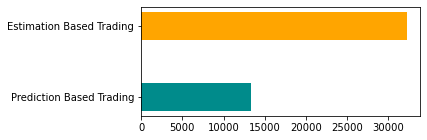

Estimated profit based trading model performed better for GRASIM
Profit/Loss from prediction based trading:  -33.56
Profit/Loss from estimation based trading:  3650.02


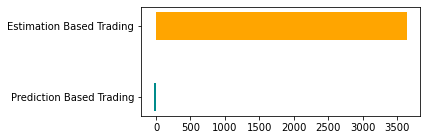

Estimated profit based trading model performed better for HCLTECH
Profit/Loss from prediction based trading:  23128.71
Profit/Loss from estimation based trading:  51350.63


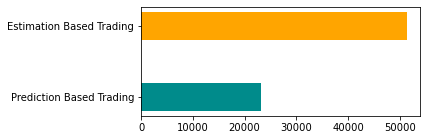

Prediction based trading model performed better for HDFCBANK
Profit/Loss from prediction based trading:  36064.71
Profit/Loss from estimation based trading:  35006.97


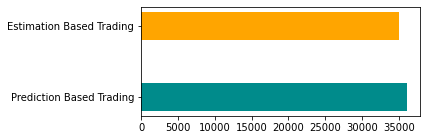

Estimated profit based trading model performed better for HEROMOTOCO
Profit/Loss from prediction based trading:  -7816.76
Profit/Loss from estimation based trading:  -7616.76


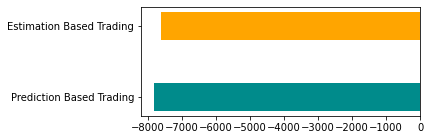

Estimated profit based trading model performed better for HINDALCO
Profit/Loss from prediction based trading:  -32159.58
Profit/Loss from estimation based trading:  -22396.43


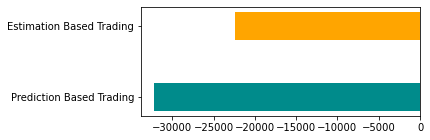

Estimated profit based trading model performed better for HINDUNILVR
Profit/Loss from prediction based trading:  11650.81
Profit/Loss from estimation based trading:  26247.08


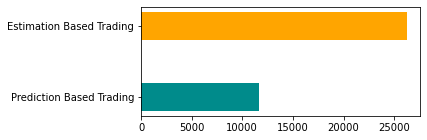

Estimated profit based trading model performed better for HDFC
Profit/Loss from prediction based trading:  15737.57
Profit/Loss from estimation based trading:  19908.46


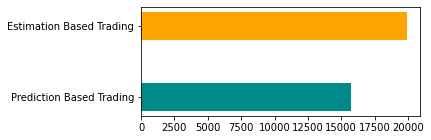

Prediction based trading model performed better for ICICIBANK
Profit/Loss from prediction based trading:  26730.05
Profit/Loss from estimation based trading:  20636.28


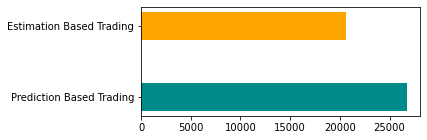

Estimated profit based trading model performed better for ITC
Profit/Loss from prediction based trading:  49158.62
Profit/Loss from estimation based trading:  53647.44


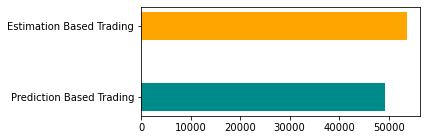

Estimated profit based trading model performed better for INDUSINDBK
Profit/Loss from prediction based trading:  25560.59
Profit/Loss from estimation based trading:  28201.48


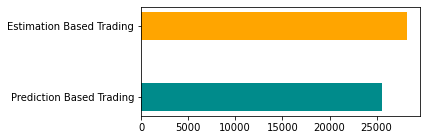

Estimated profit based trading model performed better for INFY
Profit/Loss from prediction based trading:  18982.97
Profit/Loss from estimation based trading:  21630.3


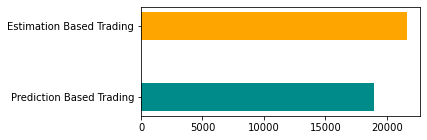

Prediction based trading model performed better for JSWSTEEL
Profit/Loss from prediction based trading:  13263.55
Profit/Loss from estimation based trading:  6604.16


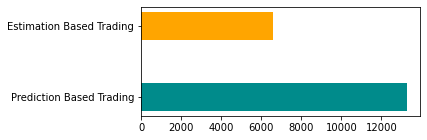

Estimated profit based trading model performed better for KOTAKBANK
Profit/Loss from prediction based trading:  25439.76
Profit/Loss from estimation based trading:  37664.46


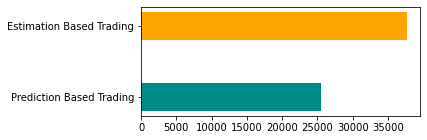

Estimated profit based trading model performed better for LT
Profit/Loss from prediction based trading:  -2751.24
Profit/Loss from estimation based trading:  -447.59


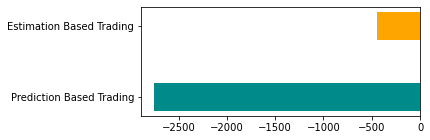

Prediction based trading model performed better for M&M
Profit/Loss from prediction based trading:  -2058.9
Profit/Loss from estimation based trading:  -11439.47


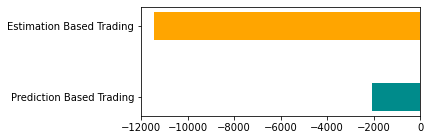

Estimated profit based trading model performed better for MARUTI
Profit/Loss from prediction based trading:  -1990.1
Profit/Loss from estimation based trading:  -1490.1


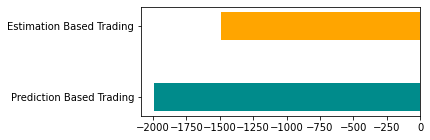

Estimated profit based trading model performed better for NTPC
Profit/Loss from prediction based trading:  16502.48
Profit/Loss from estimation based trading:  24616.04


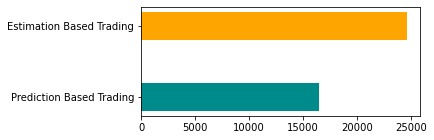

Estimated profit based trading model performed better for NESTLEIND
Profit/Loss from prediction based trading:  350.0
Profit/Loss from estimation based trading:  941.71


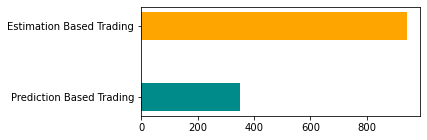

Prediction based trading model performed better for ONGC
Profit/Loss from prediction based trading:  -16031.35
Profit/Loss from estimation based trading:  -32412.95


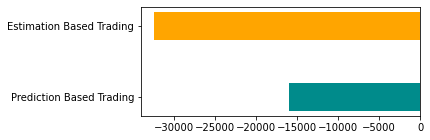

Estimated profit based trading model performed better for POWERGRID
Profit/Loss from prediction based trading:  41637.48
Profit/Loss from estimation based trading:  53664.11


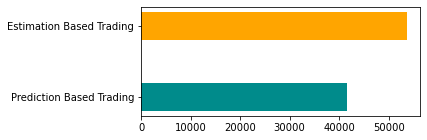

Estimated profit based trading model performed better for RELIANCE
Profit/Loss from prediction based trading:  12171.54
Profit/Loss from estimation based trading:  23161.8


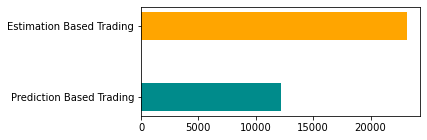

Estimated profit based trading model performed better for SBIN
Profit/Loss from prediction based trading:  2129.69
Profit/Loss from estimation based trading:  9341.14


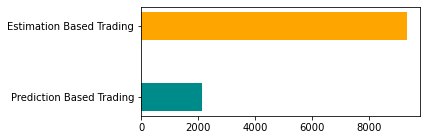

Estimated profit based trading model performed better for SUNPHARMA
Profit/Loss from prediction based trading:  22238.67
Profit/Loss from estimation based trading:  37387.13


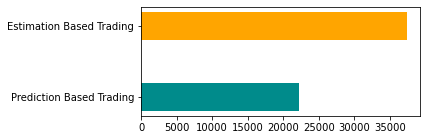

Prediction based trading model performed better for TCS
Profit/Loss from prediction based trading:  15121.2
Profit/Loss from estimation based trading:  14695.13


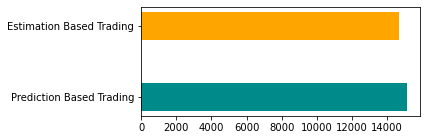

Estimated profit based trading model performed better for TATACONSUM
Profit/Loss from prediction based trading:  22915.08
Profit/Loss from estimation based trading:  30293.79


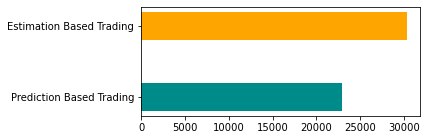

Estimated profit based trading model performed better for TATAMOTORS
Profit/Loss from prediction based trading:  -27583.47
Profit/Loss from estimation based trading:  -24169.87


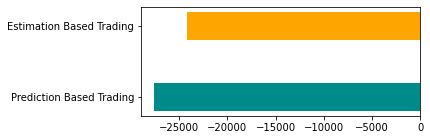

Estimated profit based trading model performed better for TATASTEEL
Profit/Loss from prediction based trading:  -28611.28
Profit/Loss from estimation based trading:  -24513.27


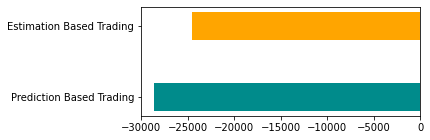

Estimated profit based trading model performed better for TECHM
Profit/Loss from prediction based trading:  -5226.6
Profit/Loss from estimation based trading:  466.52


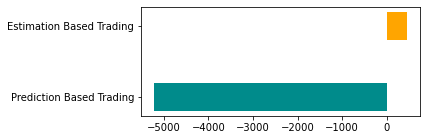

Estimated profit based trading model performed better for TITAN
Profit/Loss from prediction based trading:  24754.33
Profit/Loss from estimation based trading:  25882.45


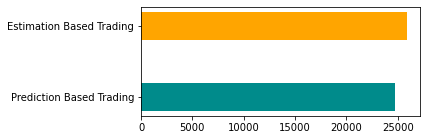

Prediction based trading model performed better for UPL
Profit/Loss from prediction based trading:  24124.12
Profit/Loss from estimation based trading:  17109.1


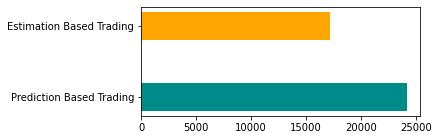

Estimated profit based trading model performed better for ULTRACEMCO
Profit/Loss from prediction based trading:  -308.15
Profit/Loss from estimation based trading:  -125.61


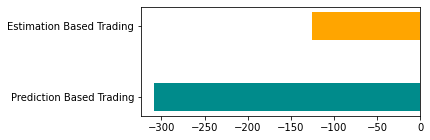

Estimated profit based trading model performed better for WIPRO
Profit/Loss from prediction based trading:  2068.1
Profit/Loss from estimation based trading:  9098.97


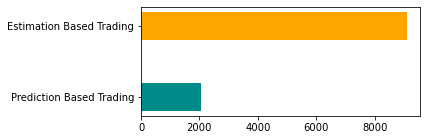

In [84]:
Predstrategy = 0
EstimatedPLstrategy = 0
clearloss = 0
clearwin = 0
TotalPredPL = 0
TotalEstimatedProfitPL = 0
stockcount = tickers.shape[0]
for i in range(stockcount):
    stock = str(tickers._get_value(i,"Symbol"))
    ticker = dataprep(stock)
    predictions = backtest(ticker, rf_best, predictors)
    predictions_filtered = predictions[predictions['Std Dev'] < 5]
    pd.set_option('mode.chained_assignment', None)
    predictions_filtered['Pred Based P/L'] = predictions_filtered.apply(Pred_Based_PL, axis=1)
    predictions_filtered['EP based P/L'] = predictions_filtered.apply(EP_Based_PL, axis=1)
    PredPL = predictions_filtered['Pred Based P/L'].sum()
    EstimatedProfitPL = predictions_filtered['EP based P/L'].sum()
    TotalPredPL = TotalPredPL+PredPL
    TotalEstimatedProfitPL = TotalEstimatedProfitPL+EstimatedProfitPL
    if (PredPL<0) & (EstimatedProfitPL>0):
        clearloss = clearloss+1
    elif (PredPL>0) & (EstimatedProfitPL<0):
        clearwin = clearwin + 1
    else:
        0
        
    if PredPL > EstimatedProfitPL:
        print("Prediction based trading model performed better for", str(stock))
        Predstrategy = Predstrategy+1
    elif EstimatedProfitPL > PredPL:
        print("Estimated profit based trading model performed better for", str(stock))
        EstimatedPLstrategy = EstimatedPLstrategy+1
    else:
        print("Both models performed the same for", str(stock))
    print("Profit/Loss from prediction based trading: ", str(round(PredPL,2)))
    print("Profit/Loss from estimation based trading: ", str(round(EstimatedProfitPL,2)))
    x = ["Prediction Based Trading", "Estimation Based Trading"]
    y = [PredPL, EstimatedProfitPL]
    c = ['DarkCyan','Orange']
    plt.figure(figsize=(5,2))
    plt.barh(x,y, color=c, height = 0.4)
    plt.show()

In [85]:
stockcount = tickers.shape[0]
scenario1 = TotalPredPL-TotalEstimatedProfitPL
scenario2 = TotalEstimatedProfitPL-TotalPredPL
if TotalPredPL > TotalEstimatedProfitPL:
    print("Prediction based trading model bettered Estimated Profit based trading model by Rs."+str(round(scenario1,2)))
else:
    print("Estimated Profit based trading model bettered Prediction based trading model by Rs."+str(round(scenario2,2)))
    
print(str(Predstrategy)+" out of "+str(stockcount)+" stocks performed better with prediction based trading")
print(str(EstimatedPLstrategy)+" out of "+str(stockcount)+" stocks performed better with estimation based trading")
print(str(clearloss)+" stocks incurred losses from prediction based trading where estimation based trading would generate profits")
print(str(clearwin)+" stocks generated profits from prediction based trading where estimation based trading would incur losses")

Estimated Profit based trading model bettered Prediction based trading model by Rs.165316.92
11 out of 48 stocks performed better with prediction based trading
37 out of 48 stocks performed better with estimation based trading
4 stocks incurred losses from prediction based trading where estimation based trading would generate profits
1 stocks generated profits from prediction based trading where estimation based trading would incur losses
